In [1]:
import os
# Load relevant packages
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pylab

from scipy import stats
import statsmodels.formula.api as sfm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import sklearn.metrics       as Metrics

# Ignore user warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
ruta=os.getcwd()+'/data/'

In [3]:
customer = pd.read_csv(ruta+'olist_customers_dataset.csv', delimiter=',') 
order_items=pd.read_csv(ruta+'olist_order_items_dataset.csv', delimiter=',') 
orders=pd.read_csv(ruta+'olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv(ruta+'olist_products_dataset.csv', delimiter=',') 
order_payments=pd.read_csv(ruta+'olist_order_payments_dataset.csv', delimiter=',')
reviews=pd.read_csv(ruta+'olist_order_reviews_dataset.csv', delimiter=',')
sellers=pd.read_csv(ruta+'olist_sellers_dataset.csv', delimiter=',') 
order_reviews=pd.read_csv(ruta+'olist_order_reviews_dataset.csv', delimiter=',') 

In [4]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [7]:
efective_orders=orders[(orders.order_status!= 'canceled') & (orders.order_status!= 'unavailable')]

In [8]:
#payment_orders= pd.concat([order_payments,efective_orders], axis=1)
payment_orders=pd.merge(order_payments, efective_orders)

In [9]:
import datetime
timesMonth=[]
timesYear=[]
weekday=[]
hour=[]
for i in payment_orders['order_purchase_timestamp']:
    fecha=pd.to_datetime(i)
    timesMonth.append(fecha.month)
    timesYear.append(fecha.year)
    weekday.append(fecha.dayofweek)
    hour.append(fecha.hour)
payment_orders['Month']=timesMonth
payment_orders['Year']=timesYear
payment_orders['WeekDay']=weekday
payment_orders['Hour']=hour
payment_orders.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Month,Year,WeekDay,Hour
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4,2018,2,22
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,6,2018,1,11
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,12,2017,1,11
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,12,2017,2,12
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,5,2018,0,13


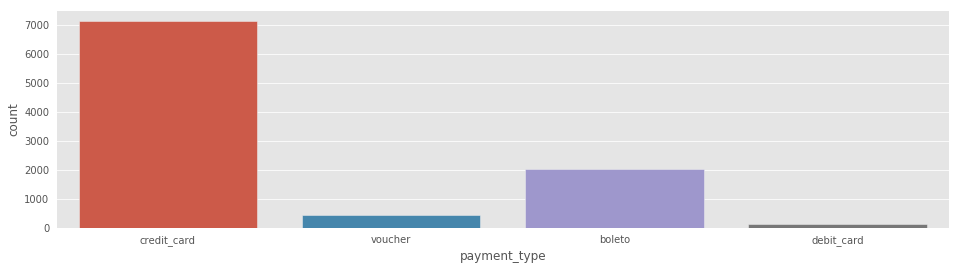

In [10]:
#Sales with more seller products(mor than 100 units per product)
dfrs = order_items.groupby('product_id').count()
dfrs.sort_values(by=['order_id'], ascending=False, inplace=True)
dfrs1 = dfrs[(dfrs['order_id']>100)]
ListProducts=dfrs1.index
ListOrders=order_items[(order_items['product_id'].isin(ListProducts))]['order_id'].unique()
pop=payment_orders[(payment_orders['order_id']).isin(ListOrders)]
plt.figure(figsize=(16, 4))
sns.countplot('payment_type',data=pop)
plt.show()

In [46]:
order_items[(order_items['product_id'].isin(['36f60d45225e60c7da4558b070ce4b60']))]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3132,070f721954fa2416856b2b30e3c3c341,2,36f60d45225e60c7da4558b070ce4b60,f457c46070d02cadd8a68551231220dd,2018-04-10 03:15:31,88.00,16.61
5217,0bd742b9af9192bb314ed381e518eb50,1,36f60d45225e60c7da4558b070ce4b60,88460e8ebdecbfecb5f9601833981930,2018-03-05 19:10:44,67.90,12.61
5410,0c433b41ac4f5739f4c65e19bbdc8208,1,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-01-16 20:57:26,109.89,11.75
6714,0f30693cac68f8597594c35a1dc38a8e,1,36f60d45225e60c7da4558b070ce4b60,88460e8ebdecbfecb5f9601833981930,2018-03-04 21:09:09,67.90,15.23
8866,1445ddbb9a2054e295d0ae5b14b1cade,1,36f60d45225e60c7da4558b070ce4b60,f457c46070d02cadd8a68551231220dd,2018-03-22 17:28:28,88.00,22.33
9410,1580aa3360c01bdd268dd1665a8ff929,1,36f60d45225e60c7da4558b070ce4b60,8e6d7754bc7e0f22c96d255ebda59eba,2018-02-07 02:53:00,89.50,16.39
10591,1830ac545c2b9909d6c6e107924faa80,1,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,2018-02-14 19:09:36,89.15,15.37
11061,1927dede91841ae67045915ce6fd11f1,1,36f60d45225e60c7da4558b070ce4b60,88460e8ebdecbfecb5f9601833981930,2018-03-05 16:56:17,67.90,15.19
11739,1aa61b751b1fcf147418fe35148bd4cc,1,36f60d45225e60c7da4558b070ce4b60,f457c46070d02cadd8a68551231220dd,2018-01-18 10:48:30,89.90,17.07
11851,1ae8a88bf94d02224f932e18297baa64,1,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,2018-03-02 07:26:59,86.00,3.96


In [48]:
order_items['netprice'] = order_items['price'] + order_items['freight_value']

In [49]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,netprice
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,65.39


In [27]:
order_items[(order_items['order_id'].isin(['ffecd5a79a0084f6a592288c67e3c298']))]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112615,ffecd5a79a0084f6a592288c67e3c298,1,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.9,15.79
112616,ffecd5a79a0084f6a592288c67e3c298,2,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.9,15.79
112617,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.9,15.79


In [25]:
order_payments[(order_payments['order_id'].isin(['ffecd5a79a0084f6a592288c67e3c298']))]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
36047,ffecd5a79a0084f6a592288c67e3c298,1,credit_card,1,113.07


In [31]:
orders[(orders['order_id'].isin(['ffecd5a79a0084f6a592288c67e3c298']))]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6947,ffecd5a79a0084f6a592288c67e3c298,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,2018-02-27 20:00:25,2018-02-27 20:15:27,2018-02-28 20:54:52,2018-03-29 14:37:05,2018-03-22 00:00:00


In [33]:
customer[customer['customer_id'].isin(['8afa5a415d65a08e3a68b1d7f9ddd8a5'])]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
11537,8afa5a415d65a08e3a68b1d7f9ddd8a5,a969e99358a58bed2f4073fd04165a2b,41810,salvador,BA


In [34]:
products[products['product_id'].isin(['50fd2b788dc166edd20512370dac54df'])]

,product_id,product_category_name,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
16579,50fd2b788dc166edd20512370dac54df,eletronicos,46.0,2285.0,1.0,150.0,30.0,10.0,20.0


In [35]:
order_reviews[order_reviews['order_id'].isin(['ffecd5a79a0084f6a592288c67e3c298'])]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
45323,63f01eff060a94c562615719b3cc7e8c,ffecd5a79a0084f6a592288c67e3c298,2,NaN,NaN,2018-03-24 00:00:00,2018-03-24 15:21:09


In [67]:
order_reviews.groupby('order_id').count()

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,0,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,0,0,1,1
000229ec398224ef6ca0657da4fc703e,1,1,0,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,0,0,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,0,1,1,1
00048cc3ae777c65dbb7d2a0634bc1ea,1,1,0,0,1,1
00054e8431b9d7675808bcb819fb4a32,1,1,0,0,1,1
000576fe39319847cbb9d288c5617fa6,1,1,0,0,1,1
0005a1a1728c9d785b8e2b08b904576c,1,1,0,1,1,1


In [42]:
order_items[(order_items['product_id'].isin(['aca2eb7d00ea1a7b8ebd4e68314663af']))].groupby('seller_id').count()

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
seller_id,,,,,,
955fee9216a65b617aa5c0531780ce60,527,527,527,527,527,527


In [37]:
sellers[sellers['seller_id'].isin(['8b321bb669392f5163d04c59e235e066'])]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
332,8b321bb669392f5163d04c59e235e066,1212,sao paulo,SP


In [23]:
order_items.groupby('order_id').count()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,1,1,1
00018f77f2f0320c557190d7a144bdd3,1,1,1,1,1,1
000229ec398224ef6ca0657da4fc703e,1,1,1,1,1,1
00024acbcdf0a6daa1e931b038114c75,1,1,1,1,1,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,1,1,1
00048cc3ae777c65dbb7d2a0634bc1ea,1,1,1,1,1,1
00054e8431b9d7675808bcb819fb4a32,1,1,1,1,1,1
000576fe39319847cbb9d288c5617fa6,1,1,1,1,1,1
0005a1a1728c9d785b8e2b08b904576c,1,1,1,1,1,1


In [45]:
order_items[(order_items['product_id'].isin(ListProducts))].groupby(['product_id','seller_id']).count()

order_id  \
product_id                       seller_id                                    
06edb72f1e0c64b14c5b79353f7abea3 391fc6631aebcf3004804e51b40bcf1e       143   
08574b074924071f4e201e151b152b4e 001cca7ae9ae17fb1caed9dfb1094831       113   
0a57f7d2c983bcf8188589a5fea4a8da 4342d4b2ba6b161468c63a7e7cfce593        18   
                                 4869f7a5dfa277a7dca6462dcf3b52b2        86   
0aabfb375647d9738ad0f7b4ea3653b1 37515688008a7a40ac93e3b2e4ab203f       142   
0bcc3eeca39e1064258aa1e932269894 1f50f920176fa81dab994f9023523100       115   
154e7e31ebfa092203795c972e5804a6 cc419e0650a3c5ba77189a1882b7556a       281   
165f86fe8b799a708a20ee4ba125c289 7ddcbb64b5bc1ef36ca8c151f6ec77df       108   
                                 b2ba3715d723d245138f291a6fe42594         1   
19c91ef95d509ea33eda93495c4d3481 06a2c3af7b3aee5d69171b0e14f0ee87       156   
2028bf1b01cafb2d2b1901fca4083222 cc419e0650a3c5ba77189a1882b7556a       138   
2b4609f8948be18874494203496bc318 cc419e0650a3c5ba77189a1882b7556a       260   
35afc973633aaeb6b877ff57b2793310 4a3ca9315b744ce9f8e9374361493884       164   
                                 d20b021d3efdf267a402c402a48ea64b         1   
368c6c730842d78016ad823897a372db 1f50f920176fa81dab994f9023523100       388   
36f60d45225e60c7da4558b070ce4b60 00fc707aaaad2d31347cf883cd2dfe10        12   
                                 0b90b6df587eb83608a64ea8b390cf07         2   
                                 229c3efbfb0ea2058de4ccdfbc3d784a         1   
                                 6973a06f484aacf400ece213dbf3d946        17   
                                 88460e8ebdecbfecb5f9601833981930        29   
                                 8e6d7754bc7e0f22c96d255ebda59eba        23   
                                 f457c46070d02cadd8a68551231220dd        43   
389d119b48cf3043d311335e499d9c6b 1f50f920176fa81dab994f9023523100       392   
3dd2a17168ec895c781a9191c1e95ad7 de722cd6dad950a92b7d4f82673f8833       274   
3fbc0ef745950c7932d5f2a446189725 06a2c3af7b3aee5d69171b0e14f0ee87       150   
422879e10f46682990de24d770e7f83d 1f50f920176fa81dab994f9023523100       484   
42a2c92a0979a949ca4ea89ec5c7b934 813348c996469b40f2e028d5429d3495       183   
437c05a395e9e47f9762e677a7068ce7 7f7b8245c336066a1f9933c359f11d77        27   
                                 bf84056e679dbe9c69929847a40e338f        38   
                                 f84fa566034f5e8e880a07ec624c56af        90   
...                                                                     ...   
b532349fe46b38fbc7bb3914c1bdae07 1025f0e2d44d7041d6cf58b6550e0bfa       169   
bb50f2e236e5eea0100680137654686c f7ba60f8c3f99e7ee4042fdef03b70c4       195   
c4baedd846ed09b85f78a781b522f126 a1043bafd471dff536d0c462352beb48       149   
c6dd917a0be2a704582055949915ab32 7a67c85e85bb2ce8582c35f2203ad736       120   
d017a2151d543a9885604dc62a3d9dcc 6560211a19b47992c3666cc44a7e94c0       140   
d1c427060a0f73f6b889a5c7c61f2ac4 a1043bafd471dff536d0c462352beb48       343   
d285360f29ac7fd97640bf0baef03de0 01ed254b9ff8407dfb9d99ba1e17d923         4   
                                 2eb70248d66e0e3ef83659f71b244378        57   
                                 4869f7a5dfa277a7dca6462dcf3b52b2        13   
                                 7d13fca15225358621be4086e1eb0964         8   
                                 7e93a43ef30c4f03f38b393420bc753a         1   
                                 b33e7c55446eabf8fe1a42d037ac7d6d        10   
                                 d650b663c3b5f6fb392b6326366efa9a         8   
                                 fa1c13f2614d7b5c4749cbc52fecda94        22   
d5991653e037ccb7af6ed7d94246b249 25c5c91f63607446a97b143d2d535d31        98   
                                 6973a06f484aacf400ece213dbf3d946         3   
                                 9c0e69c7bf2619675bbadf47b43f655a         2   
e0cf79767c5b016251fe139915c59a26 da8622b14eb17ae2831f4ac5b9dab84a       137   
e0d64dcfaa3b6db5c54ca298ae101d05 2eb70

In [50]:
df1=orders[['order_id','customer_id','order_purchase_timestamp']] 
df2=customer[['customer_id','customer_city','customer_state']] 
df=pd.merge(df1, df2, how="left", left_on="customer_id", right_on="customer_id")

In [51]:
#product_id: Identificador único del producto.order_item_id: identifica el número de artículosincluido en el mismo pedido.
df3=order_items[['order_id','product_id','price','freight_value']] 
df=pd.merge(df, df3, how="left", left_on="order_id", right_on="order_id")

In [52]:
#product_category_name:Categoría raíz del producto, en portugués
df4=products[['product_id','product_category_name','product_photos_qty']] 
df=pd.merge(df, df4, how="left", left_on="product_id", right_on="product_id")

In [53]:
#review_score:puntuacion entre 1 y 5
df5=order_reviews[['order_id','review_score']] 
df=pd.merge(df, df5, how="left", left_on="order_id", right_on="order_id")

In [54]:
df6=df.groupby('product_category_name').size().to_frame().rename(columns={0:'total_sales'}).sort_values('total_sales', ascending=False).reset_index()
df=pd.merge(df, df6, how="left", left_on="product_category_name", right_on="product_category_name")

In [55]:
df['ano_mes']=df['order_purchase_timestamp'].str.split('-', expand=True)[0]+"-"+df['order_purchase_timestamp'].str.split('-', expand=True)[1]
df['ano_mes_dt'] = pd.to_datetime(df['ano_mes'])
df['fecha'] = pd.to_datetime(df['order_purchase_timestamp'])
df['mes']= df['fecha'].dt.month
df.ano_mes = df.ano_mes.astype('category')
df['codes']= df.ano_mes.cat.codes

In [58]:
df.head(5)

,order_id,customer_id,order_purchase_timestamp,customer_city,customer_state,product_id,price,freight_value,product_category_name,product_photos_qty,review_score,total_sales,ano_mes,ano_mes_dt,fecha,mes,codes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,sao paulo,SP,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,4.0,4,6989.0,2017-10,2017-10-01,2017-10-02 10:56:33,10,12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,1.0,4,3435.0,2018-07,2018-07-01,2018-07-24 20:41:37,7,21
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,1.0,5,4256.0,2018-08,2018-08-01,2018-08-08 08:38:49,8,22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,sao goncalo do amarante,RN,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,pet_shop,3.0,5,1949.0,2017-11,2017-11-01,2017-11-18 19:28:06,11,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,santo andre,SP,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,papelaria,4.0,5,2525.0,2018-02,2018-02-01,2018-02-13 21:18:39,2,16


In [ ]:

mod2 = smf.ols(formula='price~regions+Year+Month', data=Cus_ord_itm_c).fit()
print(mod2.summary())

In [66]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,netprice
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,65.39
